![NLP](download.png)

<a name="back"></a>
# Table of contents
1. [Application of NLP](#application)
    1. [Tokenization](#subparagraph1)
    1. [Stemming](#subparagraph2)
    1. [Lemmatization](#subparagraph3)
    1. [Stopwords](#subparagraph4)
    1. [Part Of Speech tags](#subparagraph5)
    1. [The named entity recognition](#subparagraph6)
    1. [Syntax Tree](#subparagraph7)
2. [Building ML on the movie reviews](#paragraph1)
    1. [Extraction and processing of data](#subparagraph21)
    1. [Creating targets](#subparagraph22)
    1. [Creating features](#subparagraph23)
    1. [Spliting Training Dand Testing Data](#subparagraph24)
3. [Measuring the Performance of a MultinomialNB Machine Learning Model](#paragraph2)
    1. [Model Evaluation using Confusion Matrix](#subparagraph31)
    1. [Visualizing Confusion Matrix using Heatmap](#subparagraph32)
    1. [Confusion Matrix Evaluation Metrics](#subparagraph33)
    1. [ROC Curve (Plotting an ROC curve)](#subparagraph34)
    1. [AUC](#subparagraph35)
4. [Measuring the Performance of a GaussianNB Machine Learning Model](#paragraph3)
    1. [Model Evaluation using Confusion Matrix](#subparagraph41)
    1. [Visualizing Confusion Matrix using Heatmap](#subparagraph42)
    1. [Confusion Matrix Evaluation Metrics](#subparagraph43)
    1. [ROC Curve (Plotting an ROC curve)](#subparagraph44)
    1. [AUC](#subparagraph45)

# 1. Application of NLP <a name="application"></a>

## A. Tokenization <a name="subparagraph1"></a>

### Importing necessary libraries

In [1]:
import os
import nltk
import nltk.corpus

### Previous files

In [2]:
print(os.listdir(nltk.data.find("corpora")))

['brown', 'brown.zip', 'gutenberg', 'gutenberg.zip', 'movie_reviews', 'movie_reviews.zip', 'stopwords', 'stopwords.zip', 'wordnet', 'wordnet.zip', 'words', 'words.zip']


### If you don't have the Gutenberg file, use this command to download it 

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

### Viewing the Gutenberg files

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### The elements of the Hamlet

In [5]:
hamlet = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
hamlet


['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

### The first 500 elements

In [6]:
for word in hamlet[:500]:
    print(word, sep = " ", end = " ")

[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus . Scoena Prima . Enter Barnardo and Francisco two Centinels . Barnardo . Who ' s there ? Fran . Nay answer me : Stand & vnfold your selfe Bar . Long liue the King Fran . Barnardo ? Bar . He Fran . You come most carefully vpon your houre Bar . ' Tis now strook twelue , get thee to bed Francisco Fran . For this releefe much thankes : ' Tis bitter cold , And I am sicke at heart Barn . Haue you had quiet Guard ? Fran . Not a Mouse stirring Barn . Well , goodnight . If you do meet Horatio and Marcellus , the Riuals of my Watch , bid them make hast . Enter Horatio and Marcellus . Fran . I thinke I heare them . Stand : who ' s there ? Hor . Friends to this ground Mar . And Leige - men to the Dane Fran . Giue you good night Mar . O farwel honest Soldier , who hath relieu ' d you ? Fra . Barnardo ha ' s my place : giue you goodnight . Exit Fran . Mar . Holla Barnardo Bar . Say , what is Horatio there ? Hor . A peece of him Bar 

### A different paragraph about artificial intelligence from Wikipedia, but we still can do all the commands

In [7]:
AI = """Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. Leading AI textbooks define the field as the study of "intelligent agents": any system that perceives its environment and takes actions that maximize its chance of achieving its goals. 
Some popular accounts use the term "artificial intelligence" to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving", however, this definition is rejected by major AI researchers. AI applications include advanced web search engines (e.g., Google), recommendation systems (used by YouTube, Amazon and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Tesla), automated decision-making and competing at the highest level in strategic game systems (such as chess and Go). citation needed] As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. For instance, optical character recognition is frequently excluded from things considered to be AI, having become a routine technology.
Artificial intelligence was founded as an academic discipline in 1956, and in the years since has experienced several waves of optimism, followed by disappointment and the loss of funding (known as an "AI winter"), followed by new approaches, success and renewed funding. AI research has tried and discarded many different approaches since its founding, including simulating the brain, modeling human problem solving, formal logic, large databases of knowledge and imitating animal behavior. In the first decades of the 21st century, highly mathematical statistical machine learning has dominated the field, and this technique has proved highly successful, helping to solve many challenging problems throughout industry and academia. 
The various sub-fields of AI research are centered around particular goals and the use of particular tools. The traditional goals of AI research include reasoning, knowledge representation, planning, learning, natural language processing, perception, and the ability to move and manipulate objects. General intelligence (the ability to solve an arbitrary problem) is among the field\'s long-term goals.To solve these problems, AI researchers have adapted and integrated a wide range of problem-solving techniques—including search and mathematical optimization, formal logic, artificial neural networks, and methods based on statistics, probability and economics. AI also draws upon computer science, psychology, linguistics, philosophy, and many other fields. 
The field was founded on the assumption that human intelligence "can be so precisely described that a machine can be made to simulate it". This raises philosophical arguments about the mind and the ethics of creating artificial beings endowed with human-like intelligence. These issues have been explored by myth, fiction, and philosophy since antiquity. Science fiction and futurology have also suggested that, with its enormous potential and power, AI may become an existential risk to humanity.
"""

In [8]:
type(AI)

str

### Importing word_tokenize from nltk tokenize library

In [9]:
from nltk.tokenize import word_tokenize

### Tokenizing the AI

In [10]:
AI_tokens = word_tokenize(AI)
AI_tokens

['Artificial',
 'intelligence',
 '(',
 'AI',
 ')',
 'is',
 'intelligence',
 'demonstrated',
 'by',
 'machines',
 ',',
 'as',
 'opposed',
 'to',
 'natural',
 'intelligence',
 'displayed',
 'by',
 'animals',
 'including',
 'humans',
 '.',
 'Leading',
 'AI',
 'textbooks',
 'define',
 'the',
 'field',
 'as',
 'the',
 'study',
 'of',
 '``',
 'intelligent',
 'agents',
 "''",
 ':',
 'any',
 'system',
 'that',
 'perceives',
 'its',
 'environment',
 'and',
 'takes',
 'actions',
 'that',
 'maximize',
 'its',
 'chance',
 'of',
 'achieving',
 'its',
 'goals',
 '.',
 'Some',
 'popular',
 'accounts',
 'use',
 'the',
 'term',
 '``',
 'artificial',
 'intelligence',
 "''",
 'to',
 'describe',
 'machines',
 'that',
 'mimic',
 '``',
 'cognitive',
 "''",
 'functions',
 'that',
 'humans',
 'associate',
 'with',
 'the',
 'human',
 'mind',
 ',',
 'such',
 'as',
 '``',
 'learning',
 "''",
 'and',
 '``',
 'problem',
 'solving',
 "''",
 ',',
 'however',
 ',',
 'this',
 'definition',
 'is',
 'rejected',
 'by',
 

### The number of tokens

In [11]:
# Of course, the number is different from the video because the file is different
len(AI_tokens)

556

### Importing the distinct frequency function

In [12]:
from nltk.probability import FreqDist
fdist = FreqDist()

### Finding the word count of all the words in the paragraph

In [13]:
for word in AI_tokens :
    fdist[word.lower()]+=1
fdist

FreqDist({',': 45, 'and': 25, 'the': 23, '.': 17, 'ai': 14, 'of': 12, 'intelligence': 9, 'as': 9, 'to': 9, '(': 8, ...})

### The top 10 tokens with the highest frequency

In [14]:
fdist_top10 = fdist.most_common(10)
fdist_top10

[(',', 45),
 ('and', 25),
 ('the', 23),
 ('.', 17),
 ('ai', 14),
 ('of', 12),
 ('intelligence', 9),
 ('as', 9),
 ('to', 9),
 ('(', 8)]

### Importing the blank tokenizer

In [15]:
from nltk.tokenize import blankline_tokenize
AI_blank = blankline_tokenize(AI)
len(AI_blank)

1

### Importing bigrams, trigrams and ngrams

In [16]:
from nltk.util import bigrams, trigrams, ngrams

In [17]:
string = "the best and the most beautiful thing in the wold connot be seen or even touched, they must be felt with the heart"
# Splitting the string sentence into tokens
quotes_tokens = word_tokenize(string)
quotes_tokens

['the',
 'best',
 'and',
 'the',
 'most',
 'beautiful',
 'thing',
 'in',
 'the',
 'wold',
 'connot',
 'be',
 'seen',
 'or',
 'even',
 'touched',
 ',',
 'they',
 'must',
 'be',
 'felt',
 'with',
 'the',
 'heart']

### Creating the bigrams

In [18]:
quotes_bigrams = list(bigrams(quotes_tokens))
quotes_bigrams

[('the', 'best'),
 ('best', 'and'),
 ('and', 'the'),
 ('the', 'most'),
 ('most', 'beautiful'),
 ('beautiful', 'thing'),
 ('thing', 'in'),
 ('in', 'the'),
 ('the', 'wold'),
 ('wold', 'connot'),
 ('connot', 'be'),
 ('be', 'seen'),
 ('seen', 'or'),
 ('or', 'even'),
 ('even', 'touched'),
 ('touched', ','),
 (',', 'they'),
 ('they', 'must'),
 ('must', 'be'),
 ('be', 'felt'),
 ('felt', 'with'),
 ('with', 'the'),
 ('the', 'heart')]

### Creating the trigrams

In [19]:
quotes_trigrams = list(trigrams(quotes_tokens))
quotes_trigrams

[('the', 'best', 'and'),
 ('best', 'and', 'the'),
 ('and', 'the', 'most'),
 ('the', 'most', 'beautiful'),
 ('most', 'beautiful', 'thing'),
 ('beautiful', 'thing', 'in'),
 ('thing', 'in', 'the'),
 ('in', 'the', 'wold'),
 ('the', 'wold', 'connot'),
 ('wold', 'connot', 'be'),
 ('connot', 'be', 'seen'),
 ('be', 'seen', 'or'),
 ('seen', 'or', 'even'),
 ('or', 'even', 'touched'),
 ('even', 'touched', ','),
 ('touched', ',', 'they'),
 (',', 'they', 'must'),
 ('they', 'must', 'be'),
 ('must', 'be', 'felt'),
 ('be', 'felt', 'with'),
 ('felt', 'with', 'the'),
 ('with', 'the', 'heart')]

### Creating the ngrams

In [20]:
# here N = 4 
quotes_ngrams = list(ngrams(quotes_tokens,4 ))
quotes_ngrams

[('the', 'best', 'and', 'the'),
 ('best', 'and', 'the', 'most'),
 ('and', 'the', 'most', 'beautiful'),
 ('the', 'most', 'beautiful', 'thing'),
 ('most', 'beautiful', 'thing', 'in'),
 ('beautiful', 'thing', 'in', 'the'),
 ('thing', 'in', 'the', 'wold'),
 ('in', 'the', 'wold', 'connot'),
 ('the', 'wold', 'connot', 'be'),
 ('wold', 'connot', 'be', 'seen'),
 ('connot', 'be', 'seen', 'or'),
 ('be', 'seen', 'or', 'even'),
 ('seen', 'or', 'even', 'touched'),
 ('or', 'even', 'touched', ','),
 ('even', 'touched', ',', 'they'),
 ('touched', ',', 'they', 'must'),
 (',', 'they', 'must', 'be'),
 ('they', 'must', 'be', 'felt'),
 ('must', 'be', 'felt', 'with'),
 ('be', 'felt', 'with', 'the'),
 ('felt', 'with', 'the', 'heart')]

[Back to top](#back)

## B. Stemming <a name="subparagraph2"></a>

### Importing the porter stem

In [21]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()

### The stemming of the word "having"

In [22]:
pst.stem("having")

'have'

### Another examples

In [23]:
words_to_stem = ['give', "given", "giving", "gave"]
for words in words_to_stem :
    print(words+":"+pst.stem(words))

give:give
given:given
giving:give
gave:gave


### Importing and using the Lancaster stemmer

In [24]:
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
# the lancaster stemer is more agressing
for words in words_to_stem :
    print(words+":"+lst.stem(words))


give:giv
given:giv
giving:giv
gave:gav


[Back to top](#back)

## C. Lemmatization <a name="subparagraph3"></a>

### If you don't have the Wordnet dictionary use this command to download it 

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Importing the Wordnet dictionary and the wordnet lemmetizer

In [26]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

### The lemmetization of the word "corpora"

In [27]:
word_lem.lemmatize("corpora")

'corpus'

### Another examples

In [28]:
#if we don't assign the pos tags it assum that all the word are nouns
for words in words_to_stem :
    print(words+":"+word_lem.lemmatize(words))

give:give
given:given
giving:giving
gave:gave


[Back to top](#back)

## D. Stopwords <a name="subparagraph4"></a>

### Importing the stop words

In [29]:
from nltk.corpus import stopwords

### cheking the list of stopwords

In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### The total number of stopwords

In [31]:
len(stopwords.words('english'))

179

### Reviewing the top 10 tokens with the highest frequency of the AI paragraph

In [32]:
fdist_top10

[(',', 45),
 ('and', 25),
 ('the', 23),
 ('.', 17),
 ('ai', 14),
 ('of', 12),
 ('intelligence', 9),
 ('as', 9),
 ('to', 9),
 ('(', 8)]

### Importing the Re Module and creating a string that matches the punctuations

In [33]:
import re 
punctuation = re.compile(r'[-.?!,:;()|0-9]')

### Removing the stopwords of the AI tokens

In [34]:
post_punctuation = []
for words in AI_tokens :
    word = punctuation.sub("",words)
    if len(word) > 0 :
        post_punctuation.append(word)

### Viewing AI tokens without punctuation

In [35]:
post_punctuation

['Artificial',
 'intelligence',
 'AI',
 'is',
 'intelligence',
 'demonstrated',
 'by',
 'machines',
 'as',
 'opposed',
 'to',
 'natural',
 'intelligence',
 'displayed',
 'by',
 'animals',
 'including',
 'humans',
 'Leading',
 'AI',
 'textbooks',
 'define',
 'the',
 'field',
 'as',
 'the',
 'study',
 'of',
 '``',
 'intelligent',
 'agents',
 "''",
 'any',
 'system',
 'that',
 'perceives',
 'its',
 'environment',
 'and',
 'takes',
 'actions',
 'that',
 'maximize',
 'its',
 'chance',
 'of',
 'achieving',
 'its',
 'goals',
 'Some',
 'popular',
 'accounts',
 'use',
 'the',
 'term',
 '``',
 'artificial',
 'intelligence',
 "''",
 'to',
 'describe',
 'machines',
 'that',
 'mimic',
 '``',
 'cognitive',
 "''",
 'functions',
 'that',
 'humans',
 'associate',
 'with',
 'the',
 'human',
 'mind',
 'such',
 'as',
 '``',
 'learning',
 "''",
 'and',
 '``',
 'problem',
 'solving',
 "''",
 'however',
 'this',
 'definition',
 'is',
 'rejected',
 'by',
 'major',
 'AI',
 'researchers',
 'AI',
 'applications'

### The number of tokens now

In [36]:
len(post_punctuation)

476

[Back to top](#back)

## E. Part Of Speech tags <a name="subparagraph5"></a>

### Tokenizing the example Sent

In [37]:
sent = "Timohy is a natural when it comes to drawing"
sent_tokens = word_tokenize(sent)

### If you don't have the Averaged_perceptron_tagger module use this command to download it 

In [38]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Using the pos tag on the example

In [39]:
for tokens in sent_tokens :
    print(nltk.pos_tag([tokens]))

[('Timohy', 'NN')]
[('is', 'VBZ')]
[('a', 'DT')]
[('natural', 'JJ')]
[('when', 'WRB')]
[('it', 'PRP')]
[('comes', 'VBZ')]
[('to', 'TO')]
[('drawing', 'VBG')]


### Using it on another example

In [40]:
sent2 = 'John is eating a delicious cake'
sent2_tokens = word_tokenize(sent2)
for tokens in sent2_tokens :
    print(nltk.pos_tag([tokens]))

[('John', 'NNP')]
[('is', 'VBZ')]
[('eating', 'VBG')]
[('a', 'DT')]
[('delicious', 'JJ')]
[('cake', 'NN')]


[Back to top](#back)

## F. The named entity recognition <a name="subparagraph6"></a>

### If you don't have the Maxent_ne_chunker module use this command to download it 

In [41]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

### If you don't have the Words module use this command to download it 

In [42]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Importing the ne_chunk

In [43]:
from nltk import ne_chunk

### The example

In [44]:
NE_sent = 'The US President stays in the WHITE HOUSE'

### Tokenizing and adding the pos tags on this example

In [45]:
NE_tokens = word_tokenize(NE_sent)
NE_tags = nltk.pos_tag(NE_tokens)

### Using the ne_chunk

In [46]:
NE_NER = ne_chunk(NE_tags)
print(NE_NER)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  the/DT
  (FACILITY WHITE/NNP HOUSE/NNP))


[Back to top](#back)

## G. Syntax Tree <a name="subparagraph7"></a>

### Tokenizing and adding the pos tags on this example

In [47]:
new = "The big cat ate the little mouse  who was after fresh cheese"
new_tokens = nltk.pos_tag(word_tokenize(new))
new_tokens


[('The', 'DT'),
 ('big', 'JJ'),
 ('cat', 'NN'),
 ('ate', 'VBD'),
 ('the', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('after', 'IN'),
 ('fresh', 'JJ'),
 ('cheese', 'NN')]

### Creating a grammar for a noun phrase

In [48]:
# Determinant and adjectif are optionnal
gramar_np = r"NP: {<DT>?<JJ>*<NN>}"

### Creating a regular expression matching our grammar

In [49]:
chunk_paser = nltk.RegexpParser(gramar_np)

### Chunking our example, according to our grammar

In [50]:
chunk_result = chunk_paser.parse(new_tokens)
chunk_result

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [Tree('NP', [('The', 'DT'), ('big', 'JJ'), ('cat', 'NN')]), ('ate', 'VBD'), Tree('NP', [('the', 'DT'), ('little', 'JJ'), ('mouse', 'NN')]), ('who', 'WP'), ('was', 'VBD'), ('after', 'IN'), Tree('NP', [('fresh', 'JJ'), ('cheese', 'NN')])])

[Back to top](#back)

# 2. Building ML on the movie reviews <a name="paragraph1"></a>

## A. Extraction and processing of data <a name="subparagraph21"></a>

## Importing the libraries

In [51]:
import pandas as pd
import numpy as np

In [52]:
from sklearn.feature_extraction.text import CountVectorizer # transfor text to numeric vectordss

### Previous files

In [53]:
print(os.listdir(nltk.data.find("corpora")))

['brown', 'brown.zip', 'gutenberg', 'gutenberg.zip', 'movie_reviews', 'movie_reviews.zip', 'stopwords', 'stopwords.zip', 'wordnet', 'wordnet.zip', 'words', 'words.zip']


### If you don't have the Movie_reviews file use this command to download it 

In [54]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Importing the movie reviews

In [55]:
from nltk.corpus import movie_reviews

### Viewing the differents categories of the movie reviews file

In [56]:
print(movie_reviews.categories())

['neg', 'pos']


### Viewing the number and the files of the positive reviews in the movie reviews file

In [57]:
print(len(movie_reviews.fileids('pos')))
print(' ')
print(movie_reviews.fileids('pos'))

1000
 
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt', 'pos/cv010_29198.txt', 'pos/cv011_12166.txt', 'pos/cv012_29576.txt', 'pos/cv013_10159.txt', 'pos/cv014_13924.txt', 'pos/cv015_29439.txt', 'pos/cv016_4659.txt', 'pos/cv017_22464.txt', 'pos/cv018_20137.txt', 'pos/cv019_14482.txt', 'pos/cv020_8825.txt', 'pos/cv021_15838.txt', 'pos/cv022_12864.txt', 'pos/cv023_12672.txt', 'pos/cv024_6778.txt', 'pos/cv025_3108.txt', 'pos/cv026_29325.txt', 'pos/cv027_25219.txt', 'pos/cv028_26746.txt', 'pos/cv029_18643.txt', 'pos/cv030_21593.txt', 'pos/cv031_18452.txt', 'pos/cv032_22550.txt', 'pos/cv033_24444.txt', 'pos/cv034_29647.txt', 'pos/cv035_3954.txt', 'pos/cv036_16831.txt', 'pos/cv037_18510.txt', 'pos/cv038_9749.txt', 'pos/cv039_6170.txt', 'pos/cv040_8276.txt', 'pos/cv041_21113.txt', 'pos/cv042_10982.txt', 'pos/cv043_1

### Viewing the number of the negatif reviews in the movie reviews file

In [58]:
neg_rev = movie_reviews.fileids('neg')
len(neg_rev)

1000

### Viewing a file of the positive reviews in the movie reviews file

In [59]:
revi = nltk.corpus.movie_reviews.words('pos/cv000_29590.txt')
revi

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

### Converting the tokens to strings and removing extra spaces

In [60]:
rev_list = []

In [61]:
for rev in neg_rev :
    rev_text_neg = nltk.corpus.movie_reviews.words(rev)
    # converting the negative reviews
    reviw_one_string = ' '.join(rev_text_neg)
    # removing extra spaces
    reviw_one_string = reviw_one_string.replace(' ,',',')
    reviw_one_string = reviw_one_string.replace(' .','.')
    reviw_one_string = reviw_one_string.replace("\' ","'")
    reviw_one_string = reviw_one_string.replace(" \'","'")
    rev_list.append(reviw_one_string)

In [62]:
len(rev_list)

1000

In [63]:
pos_rev = movie_reviews.fileids('pos')

In [64]:
for rev_pos in pos_rev :
    rev_text_pos = nltk.corpus.movie_reviews.words(rev_pos)
    # converting the positive reviews
    reviw_one_string = ' '.join(rev_text_pos)
    # removing extra spaces
    reviw_one_string = reviw_one_string.replace(' ,',',')
    reviw_one_string = reviw_one_string.replace(' .','.')
    reviw_one_string = reviw_one_string.replace("\' ","'")
    reviw_one_string = reviw_one_string.replace(" \'","'")
    rev_list.append(reviw_one_string)

In [65]:
len(rev_list)

2000

[Back to top](#back)

## B. Creating targets <a name="subparagraph22"></a>

### Creating a targets numpy array

In [66]:
# zeros for negatives reviews
neg_targets = np.zeros((1000,),dtype = np.int)
# ones for positives reviews
pos_targets = np.ones((1000,),dtype = np.int)

C:\Users\dell\AppData\Local\Temp/ipykernel_7180/2249146230.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  neg_targets = np.zeros((1000,),dtype = np.int)
C:\Users\dell\AppData\Local\Temp/ipykernel_7180/2249146230.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the relea

### Creating a target list

In [67]:
target_list = []
for neg_tar in neg_targets :
    target_list.append(neg_tar)
for pos_tar in pos_targets :
    target_list.append(pos_tar)

In [68]:
len(target_list)

2000

### Converting the target list to pandas series

In [69]:
y = pd.Series(target_list)

In [70]:
type(y)

pandas.core.series.Series

### Viewing the first 5 entries

In [71]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

[Back to top](#back)

## C. Creating features <a name="subparagraph23"></a>

### Importing the count vectorizer

In [72]:
### you don't have imported it's already imported
from sklearn.feature_extraction.text import CountVectorizer 

In [73]:
count_vect = CountVectorizer(lowercase=True, stop_words='english', min_df=2)

### Transforming text to numeric vectors

In [74]:
X_count_vect = count_vect.fit_transform(rev_list)

In [75]:
### Dimension of the vector
X_count_vect.shape

(2000, 23784)

### Creating a list of the names of all the features

In [76]:
X_names = count_vect.get_feature_names()
X_names

['00',
 '000',
 '007',
 '05',
 '10',
 '100',
 '1000',
 '100m',
 '101',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '10th',
 '11',
 '110',
 '113',
 '115',
 '11th',
 '12',
 '126',
 '129',
 '13',
 '130',
 '132',
 '137',
 '13th',
 '14',
 '14th',
 '15',
 '150',
 '1500s',
 '155',
 '15th',
 '16',
 '160',
 '1600',
 '161',
 '16mm',
 '16th',
 '16x9',
 '17',
 '175',
 '1773',
 '17th',
 '18',
 '180',
 '1800s',
 '1839',
 '1869',
 '1871',
 '1888',
 '18th',
 '19',
 '1900',
 '1912',
 '1914',
 '1919',
 '1925',
 '1928',
 '1930',
 '1930s',
 '1932',
 '1933',
 '1935',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1943',
 '1944',
 '1945',
 '1947',
 '1948',
 '1949',
 '1950',
 '1950s',
 '1953',
 '1954',
 '1957',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '198

### Creating a pandas Dataframe of the vectorized text

In [77]:
X_count_vect = pd.DataFrame(X_count_vect.toarray(),columns=X_names)

In [78]:
### Dimension of the Dataframe
X_count_vect.shape

(2000, 23784)

### Viewing the first 5 entries

In [79]:
X_count_vect.head()

,00,000,007,05,10,100,1000,100m,101,102,...,zoom,zooming,zooms,zoot,zorg,zorro,zucker,zuko,zwick,zwigoff
0,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Back to top](#back)

## D. Spliting Training Dand Testing Data <a name="subparagraph24"></a>

### Importing libraries

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Spliting the data to training and testing set

In [81]:
X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_count_vect,y,test_size=0.25, random_state= 5)

In [82]:
### Dimension of the X_train
X_train_cv.shape

(1500, 23784)

In [83]:
### Dimension of the X_test
X_test_cv.shape

(500, 23784)

### Training the GaussianNB Model and Making Predictions With Our GaussianNB Model

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_cv,y_train_cv).predict(X_test_cv)

### Training the MultinomialNB Model

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
clf_cv = MultinomialNB()

In [88]:
clf_cv.fit(X_train_cv,y_train_cv)

MultinomialNB()

### Making Predictions With Our MultinomialNB Model

In [89]:
y_pred_cv = clf_cv.predict(X_test_cv)
type(y_pred_cv)

numpy.ndarray

### Confusion Matrix Evaluation Metrics

In [90]:
print(metrics.accuracy_score(y_test_cv,y_pred_cv))

0.798


### Model Evaluation using Confusion Matrix

In [91]:
score_clf_cv = confusion_matrix(y_test_cv,y_pred_cv)
score_clf_cv

array([[213,  45],
       [ 56, 186]], dtype=int64)

[Back to top](#back)

<a name="paragraph2"></a>
# 3. Measuring the Performance of a MultinomialNB Machine Learning Model 

### A. Model Evaluation using Confusion Matrix <a name="subparagraph31"></a>

In [92]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test_cv, y_pred_cv)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test_cv, y_pred_cv)}')

Confusion Matrix:
[[213  45]
 [ 56 186]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       258
           1       0.81      0.77      0.79       242

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



[Back to top](#back)

### B. Visualizing Confusion Matrix using Heatmap <a name="subparagraph32"></a>

In [93]:
import seaborn as sns

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

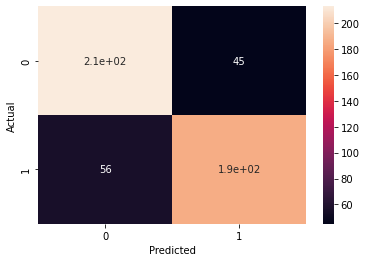

In [94]:
confusion_matrix = pd.crosstab(y_test_cv, y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

[Back to top](#back)

### C. Confusion Matrix Evaluation Metrics <a name="subparagraph33"></a>

In [95]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred_cv))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cv, y_pred_cv))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cv, y_pred_cv))

Accuracy: 0.798
Precision: 0.8051948051948052
Recall: 0.768595041322314


[Back to top](#back)

### D. ROC Curve (Plotting an ROC curve) <a name="subparagraph34"></a>

In [96]:
import matplotlib.pyplot as plt

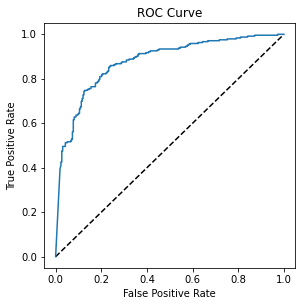

In [97]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_cv.predict_proba(X_test_cv)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[Back to top](#back)

### E. AUC <a name="subparagraph35"></a>

In [98]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test_cv, y_pred_prob)

0.8770020500993017

[Back to top](#back)

<a name="paragraph3"></a>
## 4. Measuring the Performance of a GaussianNB Machine Learning Model

### A. Model Evaluation using Confusion Matrix <a name="subparagraph41"></a>

In [99]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test_cv, y_pred_gnb)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test_cv, y_pred_gnb)}')

Confusion Matrix:
[[173  85]
 [ 88 154]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       258
           1       0.64      0.64      0.64       242

    accuracy                           0.65       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.65      0.65      0.65       500



[Back to top](#back)

### B. Visualizing Confusion Matrix using Heatmap <a name="subparagraph42"></a>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

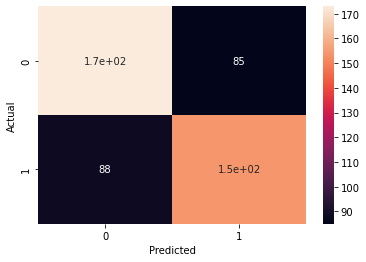

In [100]:
confusion_matrix = pd.crosstab(y_test_cv, y_pred_gnb, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

[Back to top](#back)

### C. Confusion Matrix Evaluation Metrics <a name="subparagraph43"></a>

In [101]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_cv, y_pred_gnb))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test_cv, y_pred_gnb))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test_cv, y_pred_gnb))

Accuracy: 0.654
Precision: 0.6443514644351465
Recall: 0.6363636363636364


[Back to top](#back)

### D. ROC Curve (Plotting an ROC curve) <a name="subparagraph44"></a>

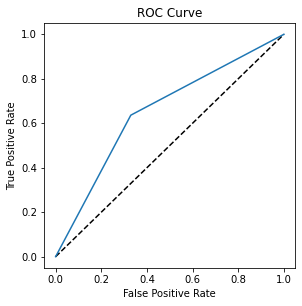

In [102]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = gnb.predict_proba(X_test_cv)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

[Back to top](#back)

### E.AUC <a name="subparagraph45"></a>

In [103]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test_cv, y_pred_prob)

0.6534531360112755

[Back to top](#back)